# Advanced Programming - Assignment 1

## 1. Community Detection Adapters – OOP Design

### A.

In [81]:
class CommunityDetectorAdapter():
    def __init__(self, detection_callable, *args):
        self.detection_callable = detection_callable
        self.args = args
    def __call__(self, graph):
        self.c = list(self.detection_callable(graph,*self.args))
        return self.c

### B.

In [3]:
import unittest
import networkx as nx

class CommunityDetectorAdapterTest(unittest.TestCase, CommunityDetectorAdapter):
    def setUp(self):
        self.g1 = nx.fast_gnp_random_graph(n=120, p=0.3)
        self.g2 = nx.erdos_renyi_graph(n=50, p=0.5)
        self.g3 = nx.random_lobster(n=150, p1=0.25, p2=0.08)
        self.g4 = nx.barabasi_albert_graph(n=100, m=1)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


### C.

In [3]:
#To install python-louvain on the jupyter notebook
import sys
!{sys.executable} -m pip install python-louvain

In [4]:
from networkx.algorithms.community import k_clique_communities

class CommunityDetectorAdapter1Test(CommunityDetectorAdapterTest, unittest.TestCase):
    def test_no_errors(self):
        cd = CommunityDetectorAdapter(k_clique_communities, 4)
        try:
            cd(self.g1)
            cd(self.g2)
            cd(self.g3)
            cd(self.g4)
        except ExceptionType:
            self.fail("Raised ExceptionType")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 2.073s

OK


In [5]:
from networkx.algorithms.community import greedy_modularity_communities

class CommunityDetectorAdapter2Test(CommunityDetectorAdapterTest, unittest.TestCase):
    def test_no_errors(self):
        cd = CommunityDetectorAdapter(greedy_modularity_communities)
        try:
            cd(self.g1)
            cd(self.g2)
            cd(self.g3)
            cd(self.g4)
        except ExceptionType:
            self.fail("Raised ExceptionType")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 3.242s

OK


In [6]:
from community import best_partition as louvain

class CommunityDetectorAdapter3Test(CommunityDetectorAdapterTest, unittest.TestCase):
    def test_no_errors(self):
        cd = CommunityDetectorAdapter(louvain)
        try:
            cd(self.g1)
            cd(self.g2)
            cd(self.g3)
            cd(self.g4)
        except ExceptionType:
            self.fail("Raised ExceptionType!")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 4.174s

OK


## 2. Parallel Community Detection Evaluation Strategies

### A.

In [33]:
g1 = nx.fast_gnp_random_graph(500, p=0.1)
g2 = nx.fast_gnp_random_graph(1000, p=0.1)

### B.

In [32]:
import time
import threading
import multiprocessing

class ParallelCommunityDetectionEvaluator():
    def __init__(self, cd_object, graph, strategy, n):
        self.cd_object = cd_object
        self.graph = graph
        self.strategy = strategy #can be 'thread' or 'process'
        self.n = n
        self.threads = []
        self.runtimes = []
    def run(self):
        if self.strategy == "thread":
            for i in range(self.n):
                start = time.time()
                t = threading.Thread(target=self.cd_object, args=(self.graph,))
                self.threads.append(t)
                t.start()
                end = time.time()
                runtime = end-start
                self.runtimes.append(runtime)
                print('At number:', i)
        elif self.strategy == "process":
            return "This does not work, see explanation below".format()
        else:
            return "Invalid Strategy".format()
    def lastRuntimes(self):
        return self.runtimes

In [22]:
#This version of multiprocessing works
from multiprocessing import Process
graph = nx.fast_gnp_random_graph(100, p=0.1)
cd_object = CommunityDetectorAdapter(k_clique_communities, 10)

p = Process(target=cd_object, name = "p1", args=(graph,))
p.start()

In [23]:
#When the amount of nodes increases, an error occurs.
graph = nx.fast_gnp_random_graph(200, p=0.1)
cd_object = CommunityDetectorAdapter(k_clique_communities, 10)

p = Process(target=cd_object, name = "p1", args=(graph,))
p.start()

BrokenPipeError: [Errno 32] Broken pipe

### C.

In [42]:
#G1 with k_clique and n=10
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 10)
x.run()
runtimes1 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [41]:
#G1 with k_clique and n=100
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 100)
x.run()
runtimes2 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [44]:
#G1 with k_clique and n=1000
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 1000)
x.run()
runtimes3 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

At number: 553
At number: 554
At number: 555
At number: 556
At number: 557
At number: 558
At number: 559
At number: 560
At number: 561
At number: 562
At number: 563
At number: 564
At number: 565
At number: 566
At number: 567
At number: 568
At number: 569
At number: 570
At number: 571
At number: 572
At number: 573
At number: 574
At number: 575
At number: 576
At number: 577
At number: 578
At number: 579
At number: 580
At number: 581
At number: 582
At number: 583
At number: 584
At number: 585
At number: 586
At number: 587
At number: 588
At number: 589
At number: 590
At number: 591
At number: 592
At number: 593
At number: 594
At number: 595
At number: 596
At number: 597
At number: 598
At number: 599
At number: 600
At number: 601
At number: 602
At number: 603
At number: 604
At number: 605
At number: 606
At number: 607
At number: 608
At number: 609
At number: 610
At number: 611
At number: 612
At number: 613
At number: 614
At number: 615
At number: 616
At number: 617
At number: 618
At number:

In [45]:
#G1 with gready_modularity and n=10
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 10)
x.run()
runtimes4 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [46]:
#G1 with gready_modularity and n=100
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 100)
x.run()
runtimes5 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [47]:
#G1 with gready_modularity and n=1000
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 1000)
x.run()
runtimes6 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

At number: 553
At number: 554
At number: 555
At number: 556
At number: 557
At number: 558
At number: 559
At number: 560
At number: 561
At number: 562
At number: 563
At number: 564
At number: 565
At number: 566
At number: 567
At number: 568
At number: 569
At number: 570
At number: 571
At number: 572
At number: 573
At number: 574
At number: 575
At number: 576
At number: 577
At number: 578
At number: 579
At number: 580
At number: 581
At number: 582
At number: 583
At number: 584
At number: 585
At number: 586
At number: 587
At number: 588
At number: 589
At number: 590
At number: 591
At number: 592
At number: 593
At number: 594
At number: 595
At number: 596
At number: 597
At number: 598
At number: 599
At number: 600
At number: 601
At number: 602
At number: 603
At number: 604
At number: 605
At number: 606
At number: 607
At number: 608
At number: 609
At number: 610
At number: 611
At number: 612
At number: 613
At number: 614
At number: 615
At number: 616
At number: 617
At number: 618
At number:

In [77]:
#G1 with louvain and n=10
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 10)
x.run()
runtimes7 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [76]:
#G1 with louvain and n=100
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 100)
x.run()
runtimes8 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [51]:
#G1 with louvain and n=1000
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g1, "thread", 1000)
x.run()
runtimes9 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

At number: 554
At number: 555
At number: 556
At number: 557
At number: 558
At number: 559
At number: 560
At number: 561
At number: 562
At number: 563
At number: 564
At number: 565
At number: 566
At number: 567
At number: 568
At number: 569
At number: 570
At number: 571
At number: 572
At number: 573
At number: 574
At number: 575
At number: 576
At number: 577
At number: 578
At number: 579
At number: 580
At number: 581
At number: 582
At number: 583
At number: 584
At number: 585
At number: 586
At number: 587
At number: 588
At number: 589
At number: 590
At number: 591
At number: 592
At number: 593
At number: 594
At number: 595
At number: 596
At number: 597
At number: 598
At number: 599
At number: 600
At number: 601
At number: 602
At number: 603
At number: 604
At number: 605
At number: 606
At number: 607
At number: 608
At number: 609
At number: 610
At number: 611
At number: 612
At number: 613
At number: 614
At number: 615
At number: 616
At number: 617
At number: 618
At number: 619
At number:

In [52]:
#G2 with k_clique and n=10
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 10)
x.run()
runtimes10 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [53]:
#G2 with k_clique and n=100
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 100)
x.run()
runtimes11 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [54]:
#G12 with k_clique and n=1000
cd = CommunityDetectorAdapter(k_clique_communities, 10)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 1000)
x.run()
runtimes12= x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

At number: 557
At number: 558
At number: 559
At number: 560
At number: 561
At number: 562
At number: 563
At number: 564
At number: 565
At number: 566
At number: 567
At number: 568
At number: 569
At number: 570
At number: 571
At number: 572
At number: 573
At number: 574
At number: 575
At number: 576
At number: 577
At number: 578
At number: 579
At number: 580
At number: 581
At number: 582
At number: 583
At number: 584
At number: 585
At number: 586
At number: 587
At number: 588
At number: 589
At number: 590
At number: 591
At number: 592
At number: 593
At number: 594
At number: 595
At number: 596
At number: 597
At number: 598
At number: 599
At number: 600
At number: 601
At number: 602
At number: 603
At number: 604
At number: 605
At number: 606
At number: 607
At number: 608
At number: 609
At number: 610
At number: 611
At number: 612
At number: 613
At number: 614
At number: 615
At number: 616
At number: 617
At number: 618
At number: 619
At number: 620
At number: 621
At number: 622
At number:

In [55]:
#G2 with gready_modularity and n=10
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 10)
x.run()
runtimes13 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [56]:
#G2 with gready_modularity and n=100
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 100)
x.run()
runtimes14 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [57]:
#G2 with gready_modularity and n=1000
cd = CommunityDetectorAdapter(greedy_modularity_communities)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 1000)
x.run()
runtimes15 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

KeyboardInterrupt: 

In [58]:
#G2 with louvain and n=10
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 10)
x.run()
runtimes16 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
[0.23473906517028809, 0.1965503692626953, 1.5149562358856201, 0.7907025814056396, 0.5364224910736084, 0.20234322547912598, 0.158858060836792, 0.10540461540222168, 1.6525366306304932, 0.09114551544189453, 0.14522290229797363, 0.7943716049194336, 0.4925704002380371, 0.6226503849029541, 0.3809807300567627, 2.897665500640869, 1.2581102848052979, 0.13718032836914062, 0.055275678634643555, 9.197721719741821, 0.4672820568084717, 0.26334142684936523, 0.21842217445373535, 0.8358266353607178, 3.006004571914673, 1.5544638633728027, 6.709462881088257, 0.06460714340209961, 0.82932448387146, 1.3373713493347168, 0.3986015319824219, 0.1710662841796875, 0.03515124320983887, 0.051882266998291016, 1.2037813663482666, 0.03158712387084961, 0.042402029037475586, 0.9802508354187012, 1.6285545825958252, 1.1117346286773682, 0.32693958282470703, 0.7439398765563965, 0.0754475593566894

In [59]:
#G2 with louvain and n=100
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 100)
x.run()
runtimes17 = x.lastRuntimes()
print(runtimes)

At number: 0
At number: 1
At number: 2
At number: 3
At number: 4
At number: 5
At number: 6
At number: 7
At number: 8
At number: 9
At number: 10
At number: 11
At number: 12
At number: 13
At number: 14
At number: 15
At number: 16
At number: 17
At number: 18
At number: 19
At number: 20
At number: 21
At number: 22
At number: 23
At number: 24
At number: 25
At number: 26
At number: 27
At number: 28
At number: 29
At number: 30
At number: 31
At number: 32
At number: 33
At number: 34
At number: 35
At number: 36
At number: 37
At number: 38
At number: 39
At number: 40
At number: 41
At number: 42
At number: 43
At number: 44
At number: 45
At number: 46
At number: 47
At number: 48
At number: 49
At number: 50
At number: 51
At number: 52
At number: 53
At number: 54
At number: 55
At number: 56
At number: 57
At number: 58
At number: 59
At number: 60
At number: 61
At number: 62
At number: 63
At number: 64
At number: 65
At number: 66
At number: 67
At number: 68
At number: 69
At number: 70
At number: 71
At

In [ ]:
#G2 with louvain and n=1000
cd = CommunityDetectorAdapter(louvain)

x = ParallelCommunityDetectionEvaluator(cd, g2, "thread", 1000)
x.run()
runtimes18 = x.lastRuntimes()
print(runtimes)

Text(0.5, 0, "Runtime of k_clique detection for graph 1 and different N's")

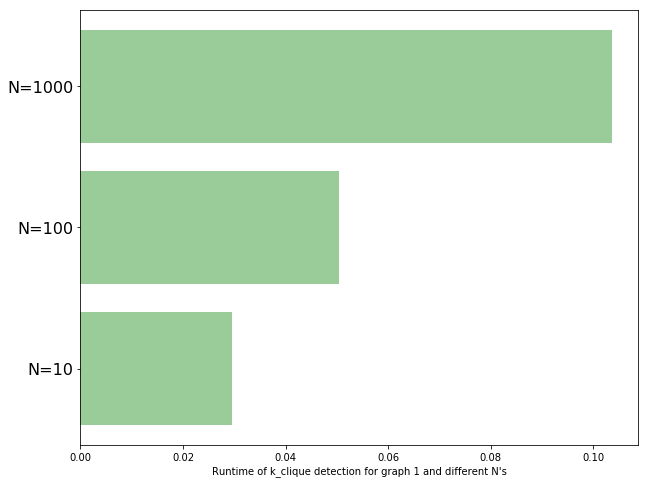

In [75]:
from matplotlib import pyplot as plt
import numpy as np

def Average(lst): 
    return sum(lst) / len(lst)

run1_avg = Average(runtimes1)
run2_avg = Average(runtimes2)
run3_avg = Average(runtimes3)
benchmarks = [run1_avg, run2_avg, run3_avg]


bar_labels = ['N=10', 'N=100' ,'N=1000']

fig = plt.figure(figsize=(10,8))

y_pos = np.arange(len(benchmarks))
plt.yticks(y_pos, bar_labels, fontsize = 16)
bars = plt.barh(y_pos, benchmarks, align='center', alpha=0.4, color= 'g')

plt.xlabel('Runtime of k_clique detection for graph 1 and different N\'s')


Text(0.5, 0, 'Runtime of k_clique, greedy modularity and louvain for graph 1 at n=100')

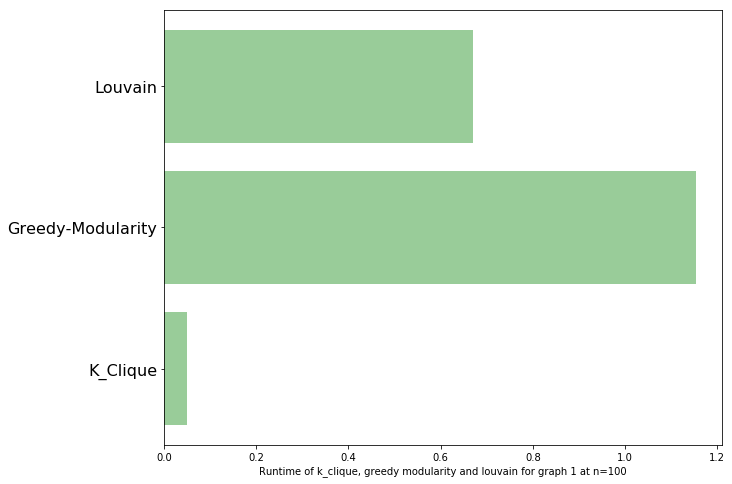

In [78]:
from matplotlib import pyplot as plt
import numpy as np

def Average(lst): 
    return sum(lst) / len(lst)

run2_avg = Average(runtimes2)
run5_avg = Average(runtimes5)
run8_avg = Average(runtimes8)
benchmarks = [run2_avg, run5_avg, run8_avg]


bar_labels = ['K_Clique', 'Greedy-Modularity' ,'Louvain']

fig = plt.figure(figsize=(10,8))

y_pos = np.arange(len(benchmarks))
plt.yticks(y_pos, bar_labels, fontsize = 16)
bars = plt.barh(y_pos, benchmarks, align='center', alpha=0.4, color= 'g')

plt.xlabel('Runtime of k_clique, greedy modularity and louvain for graph 1 at n=100')

Text(0.5, 0, "Runtime of greedy modularity detection for graph 1 and different N's")

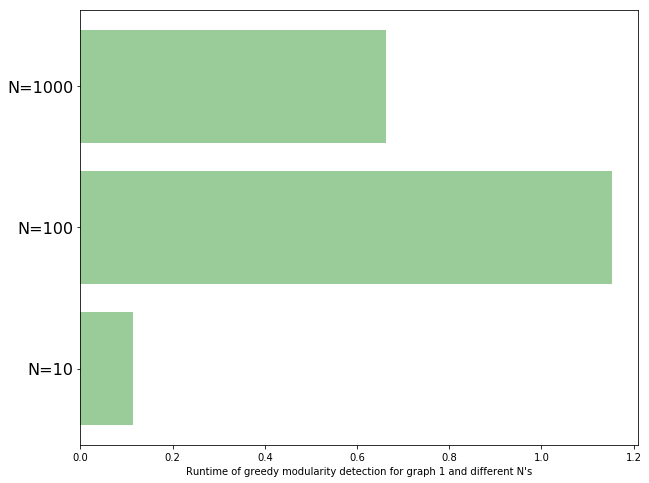

In [79]:
from matplotlib import pyplot as plt
import numpy as np

def Average(lst): 
    return sum(lst) / len(lst)

run4_avg = Average(runtimes4)
run5_avg = Average(runtimes5)
run6_avg = Average(runtimes6)
benchmarks = [run4_avg, run5_avg, run6_avg]


bar_labels = ['N=10', 'N=100' ,'N=1000']

fig = plt.figure(figsize=(10,8))

y_pos = np.arange(len(benchmarks))
plt.yticks(y_pos, bar_labels, fontsize = 16)
bars = plt.barh(y_pos, benchmarks, align='center', alpha=0.4, color= 'g')

plt.xlabel('Runtime of greedy modularity detection for graph 1 and different N\'s')

Text(0.5, 0, "Runtime of louvain detection for graph 1 and different N's")

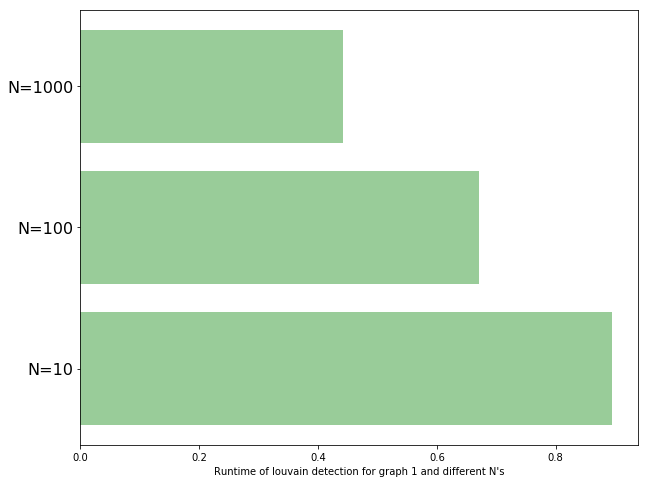

In [80]:
from matplotlib import pyplot as plt
import numpy as np

def Average(lst): 
    return sum(lst) / len(lst)

run7_avg = Average(runtimes7)
run8_avg = Average(runtimes8)
run9_avg = Average(runtimes9)
benchmarks = [run7_avg, run8_avg, run9_avg]


bar_labels = ['N=10', 'N=100' ,'N=1000']

fig = plt.figure(figsize=(10,8))

y_pos = np.arange(len(benchmarks))
plt.yticks(y_pos, bar_labels, fontsize = 16)
bars = plt.barh(y_pos, benchmarks, align='center', alpha=0.4, color= 'g')

plt.xlabel('Runtime of louvain detection for graph 1 and different N\'s')